## Bank Loan - Intermediate Logistic Regression Project

### Import necessary libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import cufflinks as cf
cf.go_offline()
%matplotlib inline

### Read in bank loan data and store in dataframe

In [17]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [19]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [43]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [55]:
bank_data = bank_data.drop(['ID', 'ZIP Code'], axis=1)

## Exploratory Analysis

<Axes: >

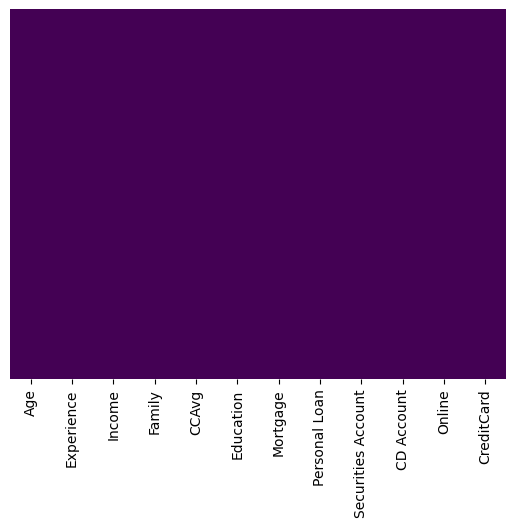

In [57]:
# Heatmap of boolean values - Yellow is True where null
sns.heatmap(bank_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

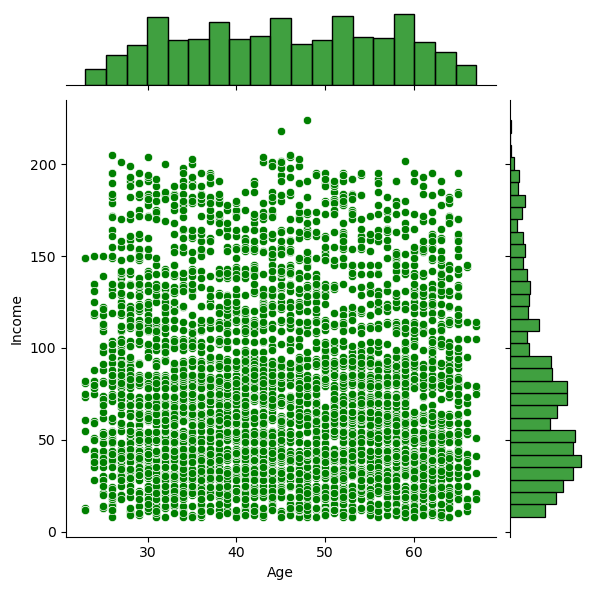

In [59]:
sns.jointplot(data=bank_data, x='Age', y='Income', kind='scatter', color='Green')

<Axes: xlabel='Family', ylabel='count'>

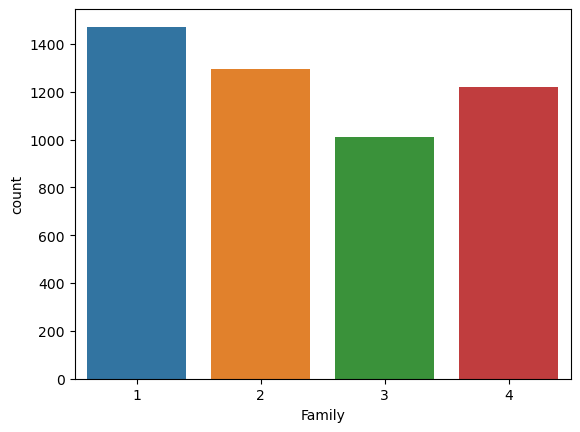

In [61]:
sns.countplot(data=bank_data, x='Family')

Highest family count is listed as 1 individual for this data set. This could potentially have some effect on whether an individual receives a loan that is personalized and aligns with their financial capabilities and needs.

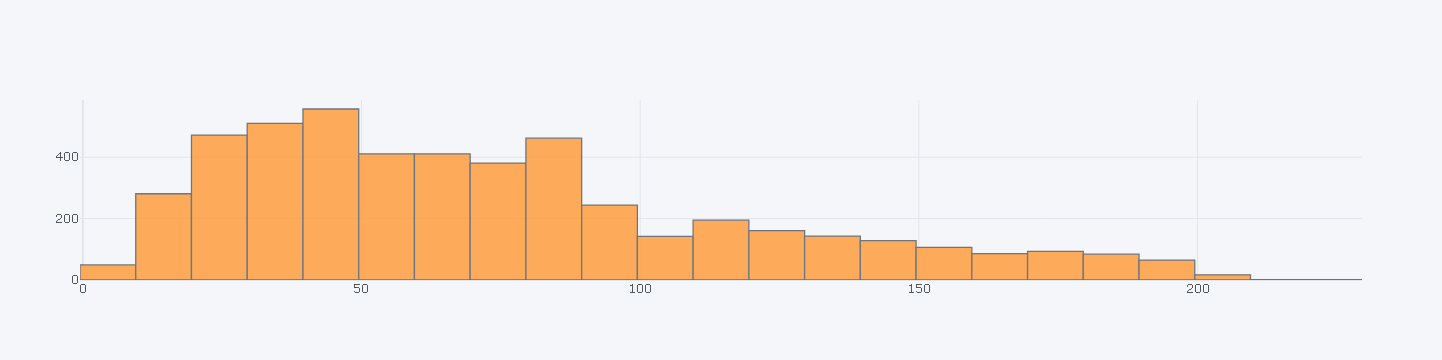

In [71]:
bank_data['Income'].iplot(kind='hist', bins=30)

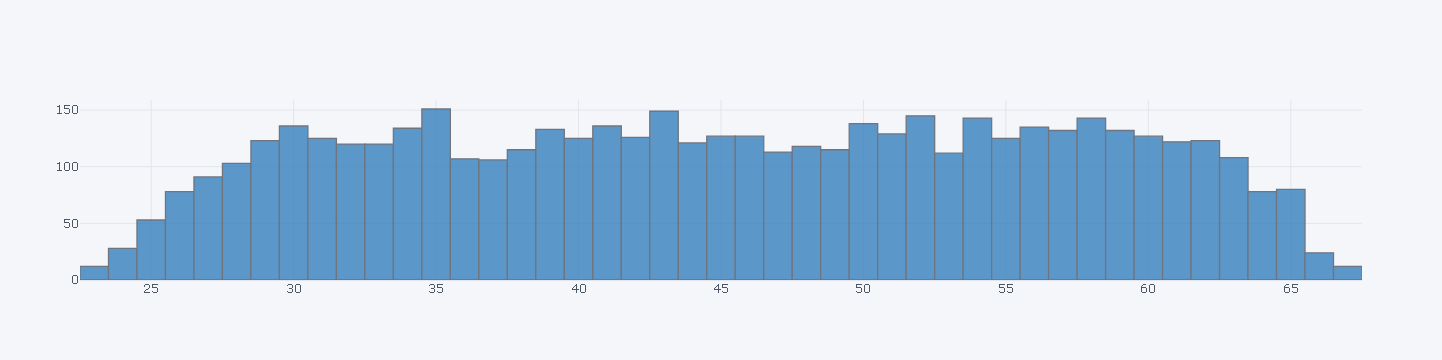

In [78]:
bank_data['Age'].iplot(kind='hist', color='Blue', bins=50)

## Train Test Split

In [89]:
X = bank_data.drop('Personal Loan',axis=1)
y = bank_data['Personal Loan'] # dependent variable we are looking to predict is the Personal Loan (Acceptance)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Instantiate the Logistic Regression Model

In [92]:
logmodel = LogisticRegression()

## Fit the model on training data

In [95]:
logmodel.fit(X_train, y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

## Predictions

In [108]:
predictions = logmodel.predict(X_test)

In [110]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.87      0.54      0.67       146

    accuracy                           0.95      1500
   macro avg       0.91      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500



## Conclusion

Model accuracy for predicting Personal Loan Acceptance is good, weighted accuracy rate is 94%.